In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df=pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.drop(columns="Unnamed: 0",axis=1,inplace=True)

In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df.shape

(200, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


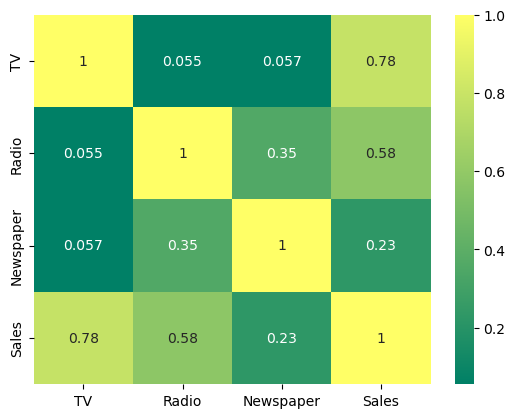

In [10]:
cor=df.corr()
sns.heatmap(cor,annot=True,cmap="summer")
plt.show()

C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

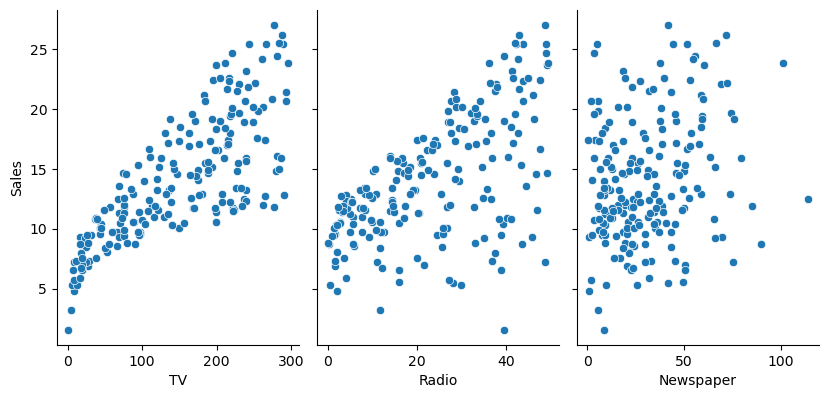

In [12]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=0.7)
plt.show()

C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


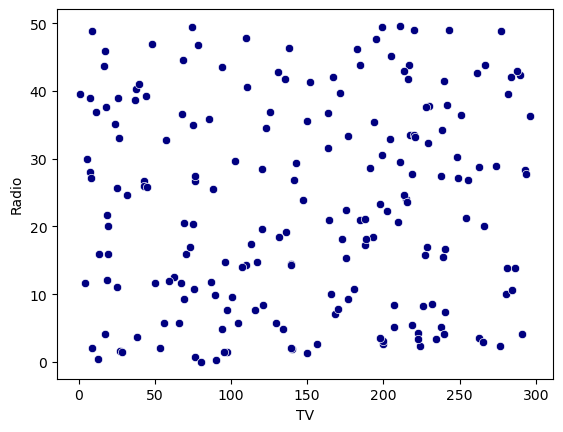

In [13]:
sns.scatterplot(data=df, x="TV", y="Radio",color="navy")
plt.show()

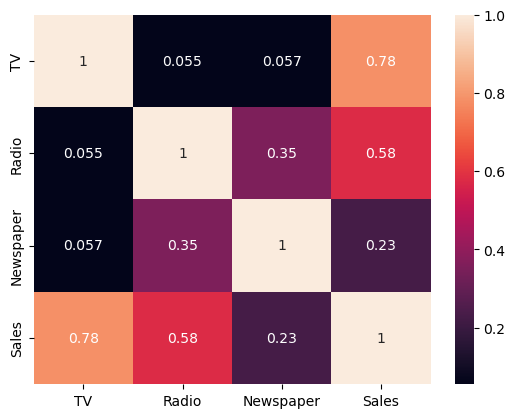

In [15]:
sns.heatmap(df.corr(), annot=True)
plt.show()

C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

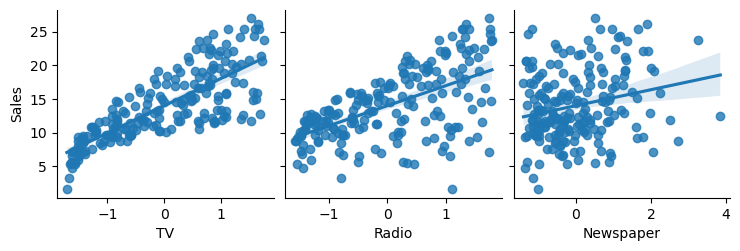

In [31]:
sns.pairplot(df, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg")

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

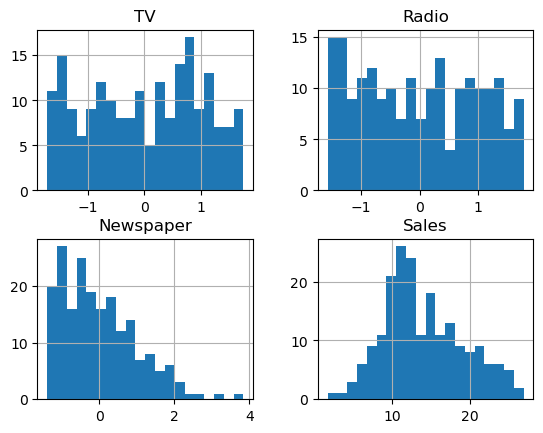

In [32]:
df.hist(bins=20)

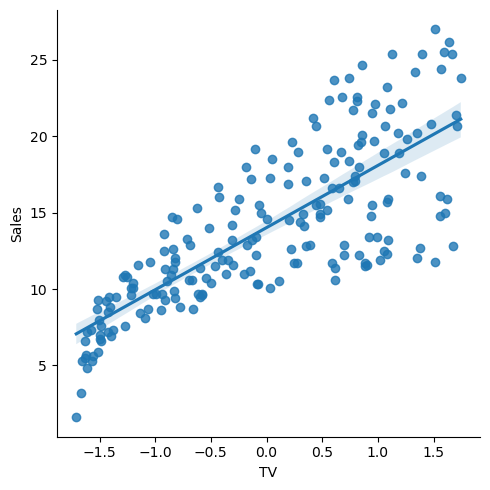

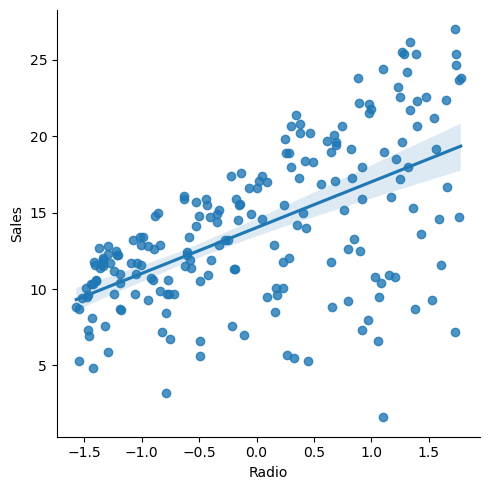

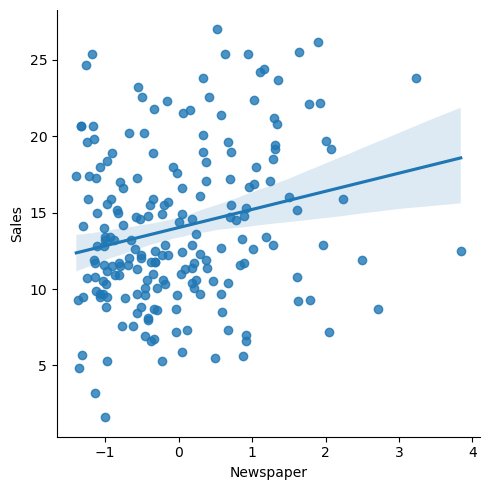

In [33]:
sns.lmplot(x='TV', y='Sales', data=df)
sns.lmplot(x='Radio', y='Sales', data=df)
sns.lmplot(x='Newspaper',y= 'Sales', data=df)

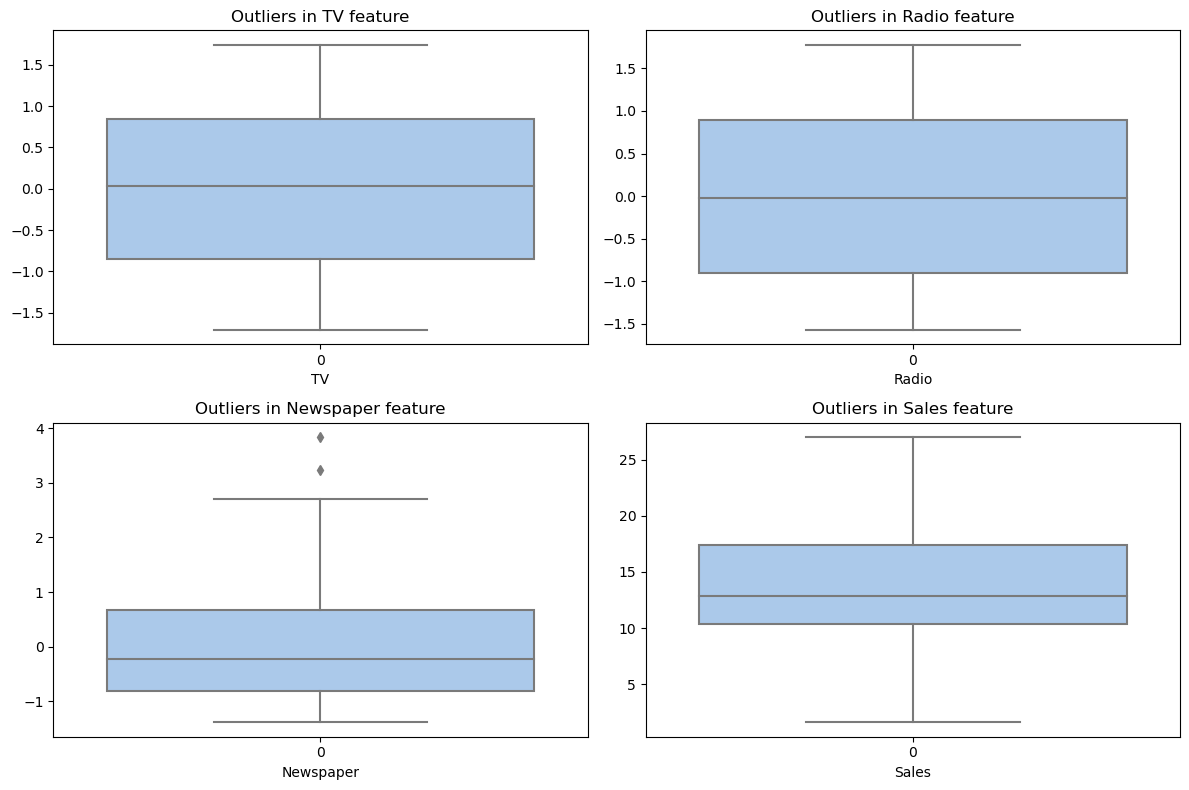

In [36]:
plt.figure(figsize=(12, 8))

columns = {0: "TV", 1: "Radio", 2: "Newspaper", 3: "Sales"}

for plot, col_name in columns.items():
    plt.subplot(2, 2, plot + 1)
    sns.boxplot(data=df[col_name],palette="pastel")
    plt.xlabel(col_name)
    plt.title("Outliers in {} feature".format(col_name))

plt.tight_layout()
plt.show()

C:\Users\Vedha\AppData\Local\Temp\ipykernel_20724\2273258663.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[col_name],hist=False, label= col_name)
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Vedha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opti

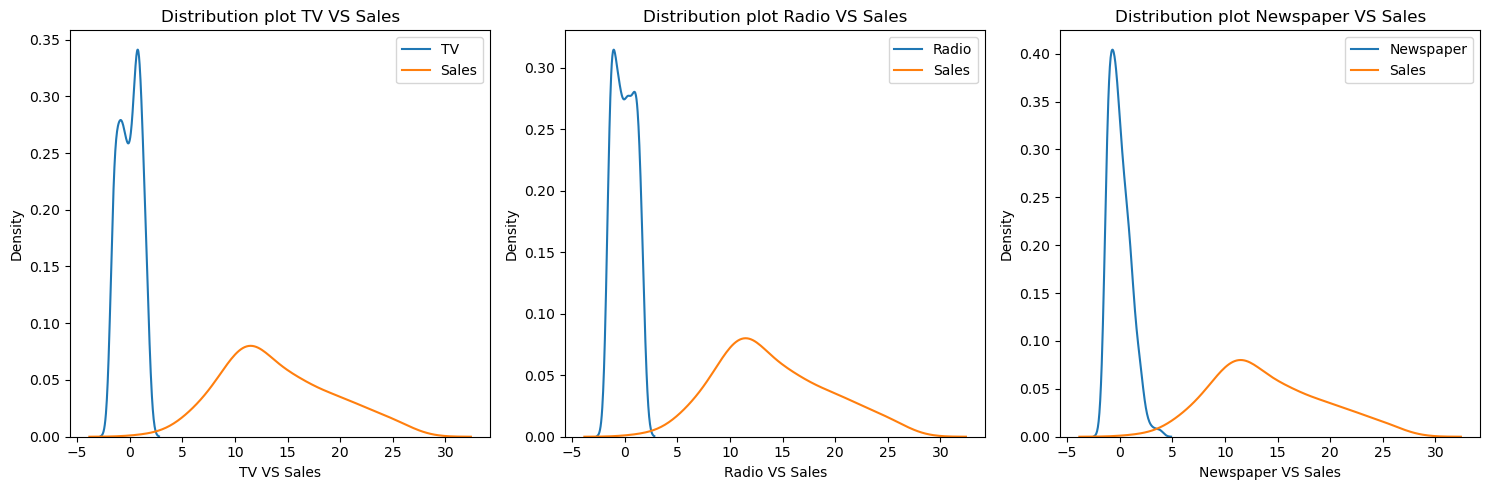

In [37]:
plt.figure(figsize=(15, 5))

columns = {0: "TV", 1: "Radio", 2: "Newspaper"}

for plot, col_name in columns.items():
    plt.subplot(1, 3, plot + 1)
    sns.distplot(x=df[col_name],hist=False, label= col_name)
    sns.distplot(x=df["Sales"],hist = False,label= "Sales")
    plt.xlabel("{} VS Sales".format(col_name))
    plt.title("Distribution plot {} VS Sales".format(col_name))
    plt.legend()

plt.tight_layout()
plt.show()

In [38]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [39]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler

le = LabelEncoder()
y= le.fit_transform(y)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
scaler = MinMaxScaler()
scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso

models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso())
]

Linear Regression
Mean Squared Error: 108.88563941729066
R2 Score: 0.913729861670454
Cross-Validation R2: 0.8829076766313095


AttributeError: 'numpy.ndarray' object has no attribute 'index'

<Figure size 1000x600 with 0 Axes>

Linear Regression
Mean Squared Error: 108.88563941729066
R2 Score: 0.913729861670454
Cross-Validation R2: 0.8829076766313095


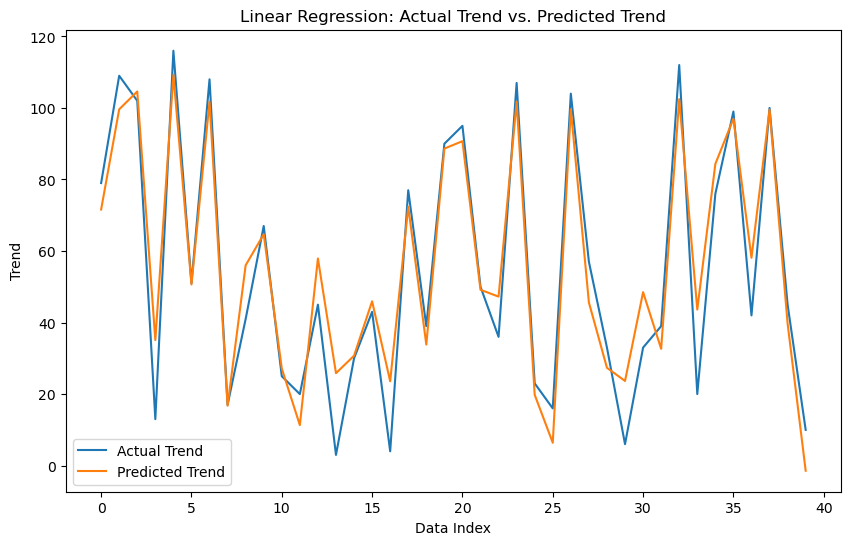


Ridge Regression
Mean Squared Error: 124.16557474271458
R2 Score: 0.9016235624261708
Cross-Validation R2: 0.8744917309227282


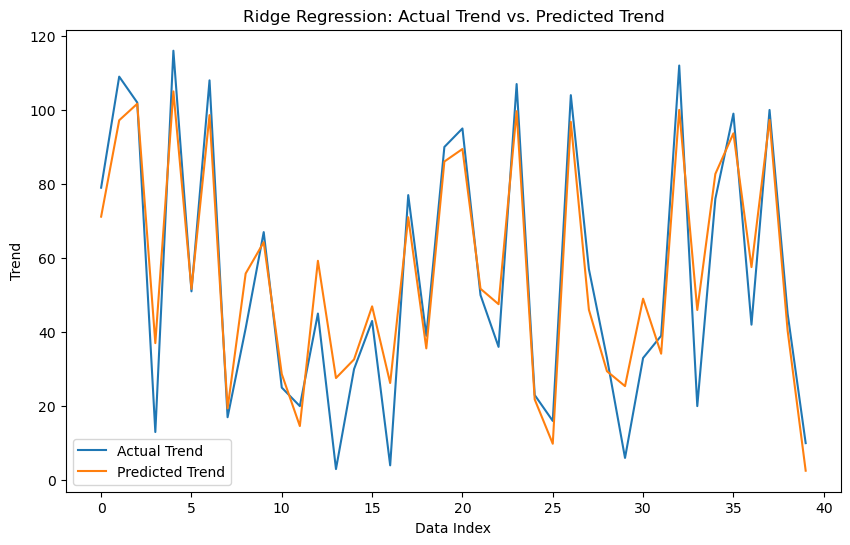


Lasso Regression
Mean Squared Error: 152.65126991931305
R2 Score: 0.8790543340462877
Cross-Validation R2: 0.8556271875371658


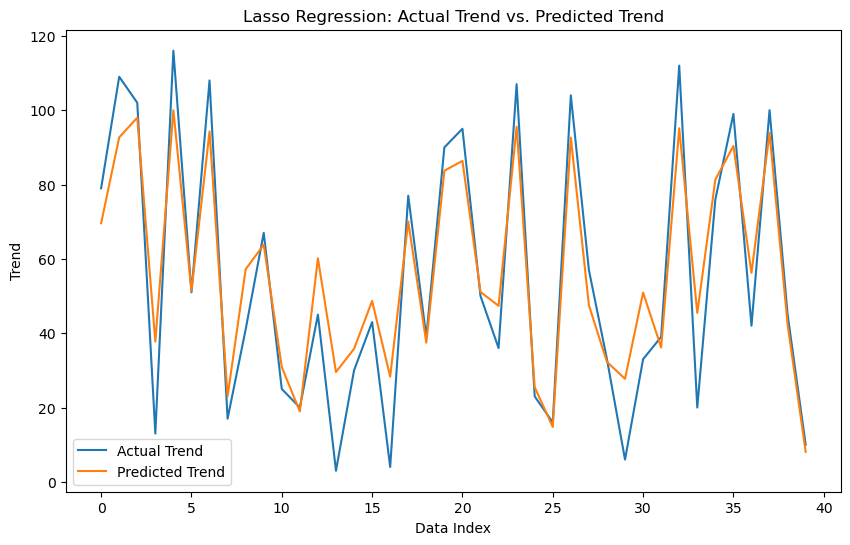

In [46]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    
    print(f"{name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R2 Score: {r2}")
    print(f"Cross-Validation R2: {cv_scores.mean()}")
    
    # Create an index for the test set
    index = np.arange(len(y_test))
    
    plt.figure(figsize=(10, 6))
    plt.plot(index, y_test, label='Actual Trend')
    plt.plot(index, y_pred, label='Predicted Trend')
    plt.xlabel('Data Index')
    plt.ylabel('Trend')
    plt.title(f'{name}: Actual Trend vs. Predicted Trend')
    plt.legend()
    plt.show()
    print()


In [17]:
# Define features and target variable
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Make predictions on the test set
y_pred = model.predict(X_test)
# Model evaluation
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 3.174097353976104
R2 Score: 0.899438024100912


In [19]:
new_data = pd.DataFrame({'TV': [200], 'Radio': [50], 'Newspaper': [10]})
predicted_sales = model.predict(new_data)
print('Predicted Sales:', predicted_sales)

Predicted Sales: [21.41233469]


In [26]:
import statsmodels.api as sm
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.109
Model:                            OLS   Adj. R-squared (uncentered):              0.095
Method:                 Least Squares   F-statistic:                              8.002
Date:                Mon, 03 Jun 2024   Prob (F-statistic):                    4.64e-05
Time:                        17:55:09   Log-Likelihood:                         -813.33
No. Observations:                 200   AIC:                                      1633.
Df Residuals:                     197   BIC:                                      1643.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             3.9193      1.008      3.887      0.000       1.931       5.908
Radio          2.7921      1.077      2.593      0.010       0.669       4.915
Newspaper     -0.0225      1.077     -0.021      0.983      -2.146       2.101
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   0.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         1.46
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
#advertisting vs sales

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df[["TV"]], df[["Sales"]], test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

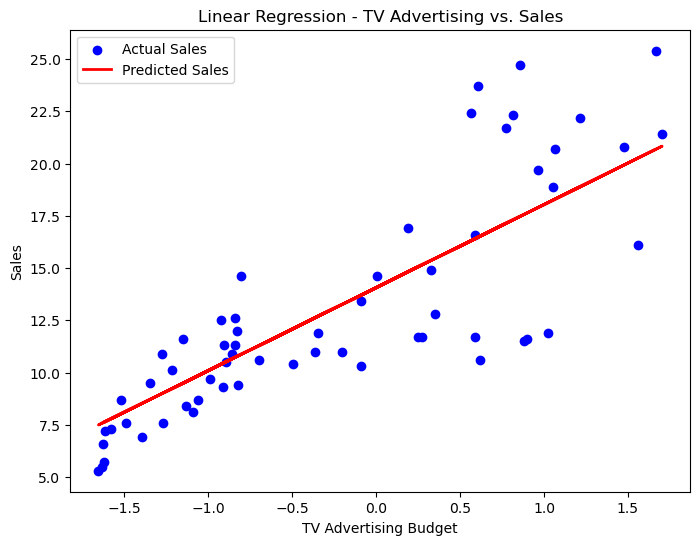

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(x_test, y_test, color='blue', label='Actual Sales')
plt.plot(x_test, predictions, color='red', linewidth=2, label='Predicted Sales')
plt.title('Linear Regression - TV Advertising vs. Sales')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.legend()
plt.show()